In [145]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [108]:
with open('data/syn_no_cookies.txt') as f:
    syn_no_cookies = f.readlines()
syn_no_cookies = [x.strip() for x in syn_no_cookies]
with open('data/fin_no_cookies.txt') as f:
    fin_no_cookies = f.readlines()
fin_no_cookies = [x.strip() for x in fin_no_cookies]

with open('data/syn_cookies.txt') as f:
    syn_cookies = f.readlines()
syn_cookies = [x.strip() for x in syn_cookies]
with open('data/fin_cookies.txt') as f:
    fin_cookies = f.readlines()
fin_cookies = [x.strip() for x in fin_cookies]

def cleanInput(i):
    i = i[0::2]
    i = [x.replace(' IP','') for x in i]
    i = [x.replace(' > ','') for x in i]
    i =  [x.replace(': tcp 0','') for x in i]
    i = [x.split(' ') for x in i]
    i = [(datetime.datetime.strptime(x[0],'%H:%M:%S.%f'),x[1]) for x in i]
    return dict((x[1],x[0]) for x in i)

syn_no_cookies = cleanInput(syn_no_cookies)
fin_no_cookies = cleanInput(fin_no_cookies)

syn_cookies = cleanInput(syn_cookies)
fin_cookies = cleanInput(fin_cookies)

In [112]:
def coallate(syn,fin):
    ret = []
    for key in syn:
        if key in fin:
            ret.append([syn[key],fin[key]-syn[key]])
        else:
            ret.append([syn[key],200])
    return ret

cookies = coallate(syn_cookies,fin_cookies)
no_cookies = coallate(syn_no_cookies,fin_no_cookies)

In [129]:
cookies_start = [x[0] for x in cookies]
cookies_duration = [x[1] for x in cookies]

no_cookies_start = [x[0] for x in no_cookies]
no_cookies_duration = [x[1] for x in no_cookies]

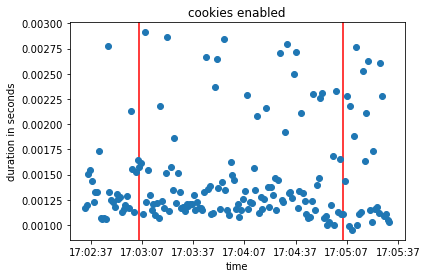

In [167]:
dates = matplotlib.dates.date2num(cookies_start)
values = [x.total_seconds() for x in cookies_duration]
plt.axvline(datetime.datetime(1900, 1, 1, 17, 3, 5),color='r')
plt.axvline(datetime.datetime(1900, 1, 1, 17, 5, 5),color='r')
plt.plot_date(dates, values);
plt.xlabel('time')
plt.ylabel('duration in seconds')
plt.title('cookies enabled')
#values

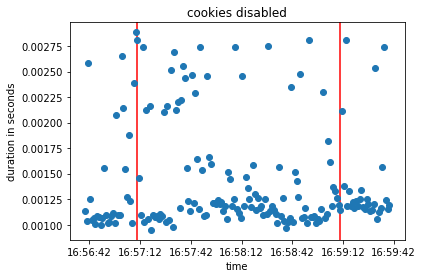

In [168]:
dates = matplotlib.dates.date2num(no_cookies_start)
values = [x.total_seconds() for x in no_cookies_duration]
plt.axvline(datetime.datetime(1900, 1, 1, 16, 57, 10),color='r')
plt.axvline(datetime.datetime(1900, 1, 1, 16, 59, 10),color='r')
plt.xlabel('time')
plt.ylabel('duration in seconds')
plt.title('cookies disabled')
plt.plot_date(dates, values);